
# Семинар: Линейная регрессия. Задачи

### Задание: Линейная регрессия.

В этом задании мы рассмотрим метод линейной регрессии (метод наименьших квадратов - МНК). Мы будем работать с наборов данных, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 1.1.** Есть ли в наборе данных пропущенные значения? Если да, удалите их.

In [ ]:
print(data.isnull().sum())

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


**Задача 1.2.** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [ ]:
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 1.3.** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [ ]:
numeric_features = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_features.corr()
target_correlation = correlation_matrix.iloc[-1, :-1]
most_correlated_features = target_correlation.abs().nlargest(5)
print(most_correlated_features)

x        0.970772
carat    0.953387
y        0.952006
price    0.861249
table    0.150929
Name: z, dtype: float64


**Задача 1.4.** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [ ]:
data = pd.get_dummies(data, drop_first=False)
data.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


**Задача 1.5.** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('price', axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 1.6.** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Создаем экземпляр класса StandardScaler
scaler = StandardScaler()

# Масштабируем вещественные признаки тренировочной выборки
X_train_scaled = scaler.fit_transform(X_train)

# Масштабируем вещественные признаки тестовой выборки
X_test_scaled = scaler.transform(X_test)

**Задача 1.7.** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Создаем экземпляр класса LinearRegression
regressor = LinearRegression()

# Обучаем модель на масштабированных данных тренировочной выборки
regressor.fit(X_train_scaled, y_train)

# Предсказываем значения целевой переменной на тренировочной выборке
y_train_pred = regressor.predict(X_train_scaled)

# Предсказываем значения целевой переменной на тестовой выборке
y_test_pred = regressor.predict(X_test_scaled)

# Вычисляем среднеквадратичную ошибку на тренировочной выборке
mse_train = mean_squared_error(y_train, y_train_pred)**0.5

# Вычисляем среднеквадратичную ошибку на тестовой выборке
mse_test = mean_squared_error(y_test, y_test_pred)**0.5

# Выводим среднеквадратичную ошибку на тренировочной и тестовой выборках
print("Среднеквадратичная ошибка на тренировочной выборке:", mse_train)
print("Среднеквадратичная ошибка на тестовой выборке:", mse_test)


Среднеквадратичная ошибка на тренировочной выборке: 1130.2253824561174
Среднеквадратичная ошибка на тестовой выборке: 1131.111094701495


**Задача 1.8.** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов (весов). Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [ ]:
coefficients = regressor.coef_
# Находим вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных
significant_features = []
for feature, coefficient in zip(X.columns, coefficients):
    if abs(coefficient) > abs(coefficients).mean():
        significant_features.append(feature)

# Выводим названия вещественных переменных, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных
print("Вещественные переменные с оценками коэффициентов, превышающими оценки прочих вещественных переменных:")
for feature in significant_features:
    print(feature)

Вещественные переменные с оценками коэффициентов, превышающими оценки прочих вещественных переменных:
carat
x
clarity_I1
clarity_SI2


**Задача 1.9.** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, *между некоторыми признаками* имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности* (наличия линейной зависимости между объясняющими переменными (факторами) модели). Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно   
*либо исключить некоторые признаки из модели*,  
*либо использовать регуляризацию*.   
Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Выберите два признака, сильно коррелирующих между собой, и постройте зависимость (scatter) одного от другого.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [ ]:
lasso = Lasso(10.0).fit(X_train_scaled, y_train) # применяем Lasso регрессию к основной выборке
print("Lasso")
print(f"Train: {mean_squared_error(y_train, lasso.predict(X_train_scaled))**0.5}") # находим MSE для основной выборки
print(f"Test: {mean_squared_error(y_test, lasso.predict(X_test_scaled))**0.5}") # находим MSE для тестовой выборки

ridge = Ridge(10.0).fit(X_train_scaled, y_train) # то же самое, только для Ridge регрессии
print("\nRidge")
print(f"Train: {mean_squared_error(y_train, ridge.predict(X_train_scaled))**0.5}")
print(f"Test: {mean_squared_error(y_test, ridge.predict(X_test_scaled))**0.5}")

Lasso
Train: 1135.2924235459586
Test: 1130.9415385973173

Ridge
Train: 1130.2605993736456
Test: 1130.5427227672078


**Задача 3.10** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод сильнее уменьшает веса? Лассо снижает лучше, следуя из графика

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.471e+08, tolerance: 6.027e+07
  model = cd_fast.enet_coordinate_descent(


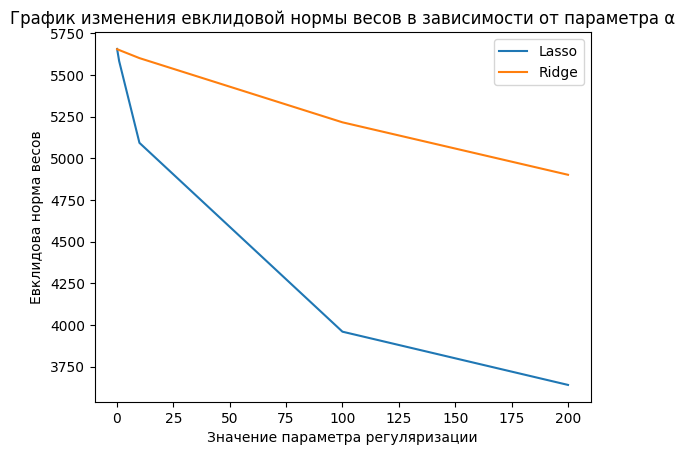

In [ ]:
# Сисок значений параметра регуляризации
alphas = [0.1, 1, 10, 100, 200]

# Списки для хранения норм весов
lasso_norms = []
ridge_norms = []

# Обучаем модели и считаем нормы весов
for alpha in alphas:
    # Lasso
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    lasso_norms.append(np.linalg.norm(lasso.coef_))

    # Ridge
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    ridge_norms.append(np.linalg.norm(ridge.coef_))

# Строим график
plt.plot(alphas, lasso_norms, label='Lasso')
plt.plot(alphas, ridge_norms, label='Ridge')
plt.xlabel('Значение параметра регуляризации')
plt.ylabel('Евклидова норма весов')
plt.title('График изменения евклидовой нормы весов в зависимости от параметра α')
plt.legend()
plt.show()

График позволяет сравнить, как изменяется норма весов для Lasso- и Ridge-регрессий при разных значениях параметра регуляризации. Из графика можно сделать вывод, что при увеличении параметра регуляризации норма весов уменьшается как для Lasso-, так и для Ridge-регрессий. Однако, для Lasso-регрессии норма весов быстрее уменьшается, чем для Ridge-регрессии. Это связано с тем, что Lasso-регрессия имеет свойство отбора признаков, что приводит к уменьшению числа ненулевых коэффициентов.